# Sun radiation Prediction

### Contribution
- **Mohammed Ali**:
   - Data Cleaning
   - Exploratory data analysis
   - Machine Learning
 
   
   
- **Omar Kotb**:


  
  
- **Ahmed Abdelhameed**:



- **Sinder Leidland**:
    
    
    
- **Danil fylling**:



In [346]:
import pandas as pd 
import sklearn
import missingno
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split   #for spliting test and train data
from sklearn.preprocessing import MinMaxScaler   #for normalizing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn import neighbors
from math import sqrt

from sklearn.metrics import mean_absolute_error, mean_squared_error  #for calculation of errors
plt.style.use('seaborn-white')

## Read datasets

 <li>The data set is downloaded fromthe provided Kaggle Link: https://www.kaggle.com/dronio/SolarEnergy  


<li>The variables are extracted from common separated values(csv)files.
    
<li>The script then displays the different variables. The data sets contain a number of different measurements. The data set includes UNIXTime, Data, Time, Radiation, Temperature, Pressure, Humidity, WindDirection(Degrees), Speed, TimeSunRise and TimeSunSet. 

 
<li>The size of the data is also shown to have an idea how big the file is. </li>


In [347]:
Dataset = pd.read_csv('SolarPrediction.CSV')
Dataset.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [348]:
#check data size
print('Size of the data = ', Dataset.shape)

Size of the data =  (32686, 11)


In [349]:
#check data size
print('Features = ', list(Dataset.columns))
      

Features =  ['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet']


## Exploratory the dataset
This stage is an open-ended process where we calculate statistics and make figures to find trends, missing values, outliers, anomalies, patterns, or relationships within the data.

<ul>
 <li>We start cleaning and extracting the columns we are intrested in. All cleaning are done in pandas.</li>
 <li>During the cleaning process we see that there are no missing (null) values. UNIXTime column was removed.

In [272]:
# check data types
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32686 entries, 0 to 32685
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UNIXTime                32686 non-null  int64  
 1   Data                    32686 non-null  object 
 2   Time                    32686 non-null  object 
 3   Radiation               32686 non-null  float64
 4   Temperature             32686 non-null  int64  
 5   Pressure                32686 non-null  float64
 6   Humidity                32686 non-null  int64  
 7   WindDirection(Degrees)  32686 non-null  float64
 8   Speed                   32686 non-null  float64
 9   TimeSunRise             32686 non-null  object 
 10  TimeSunSet              32686 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 2.7+ MB


In [273]:
len(Dataset['Data'].unique())

118

In [274]:
# checking for missing (null) data
Dataset.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

<AxesSubplot:>

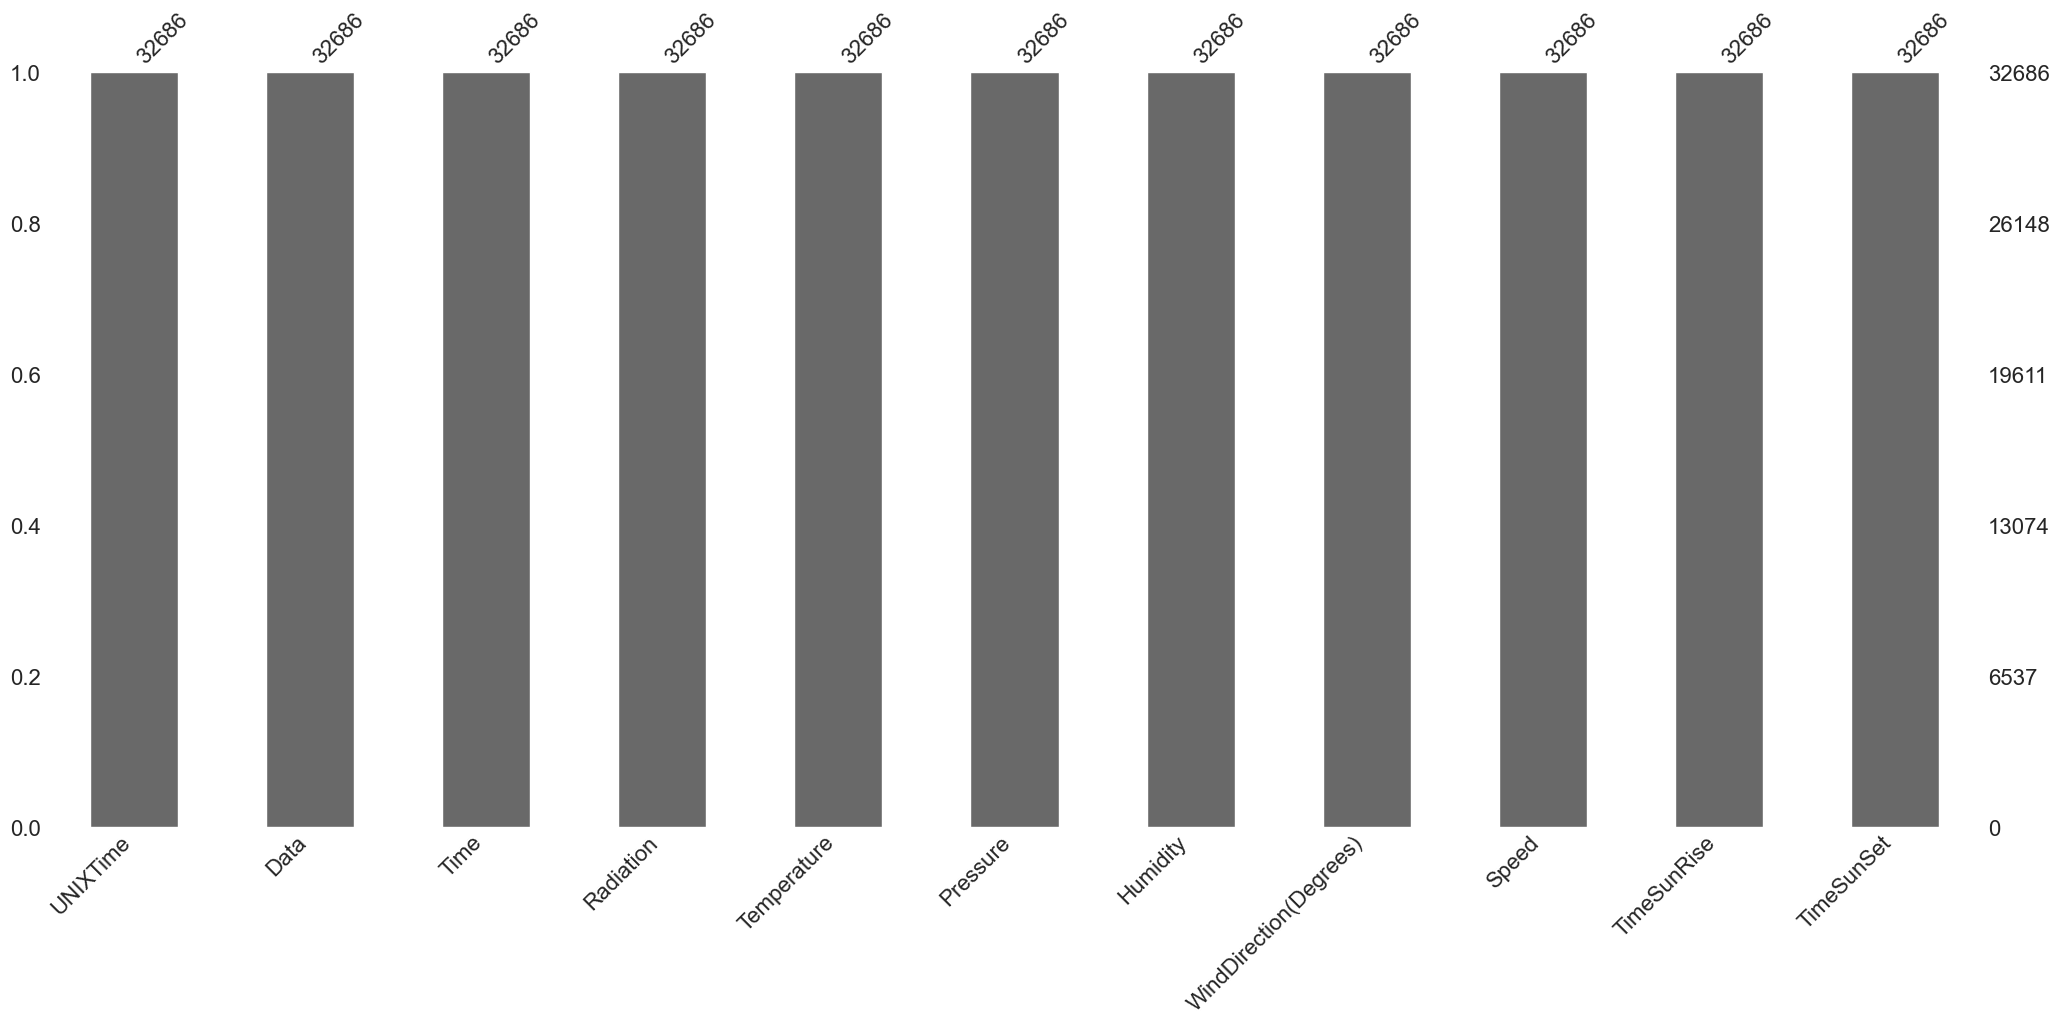

In [275]:
# visualizing data coverage for each feature 
missingno.bar(Dataset)

In [266]:
# No missed data found 

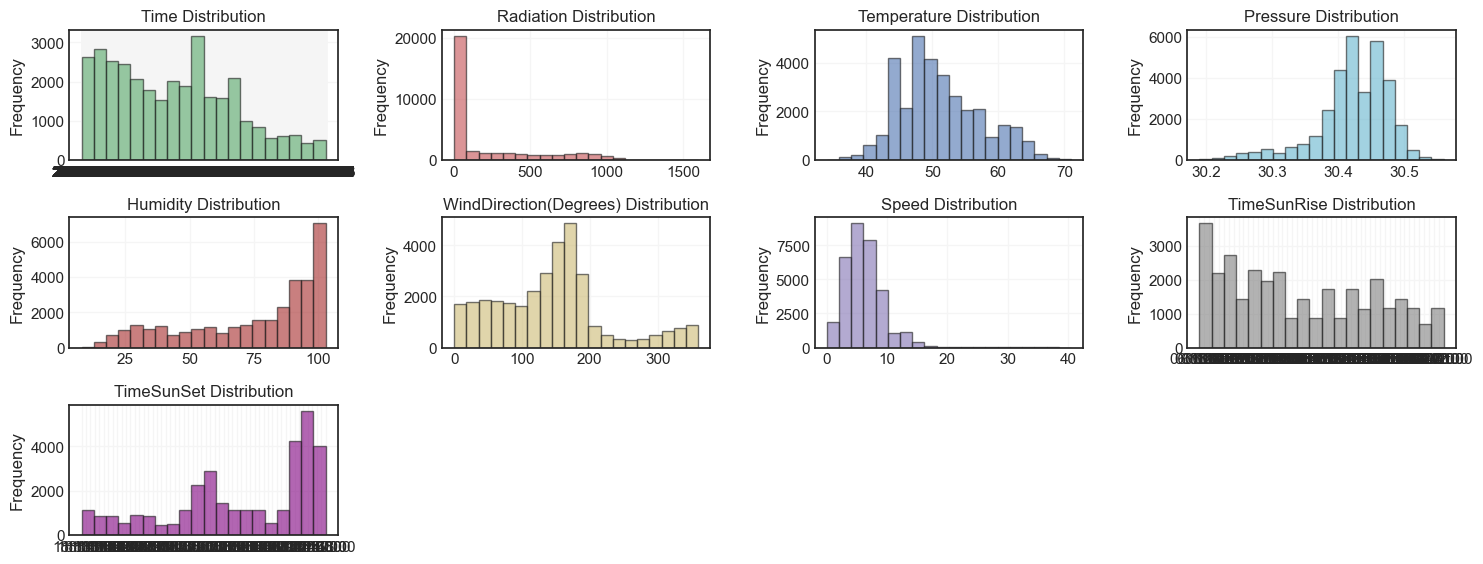

In [277]:
# Visualizing data distribution for each feature
rows = 8
cols = 4
colors = ['g','r','b','c','brown','y','m','grey','purple','orange','silver','g','r','b','c','brown','y','m','grey','purple','orange','silver', 'g','r','b','c','brown','y','m','grey','purple','orange']
fig=plt.figure(figsize=(15,15))

for i, feature in enumerate(Dataset.columns[2:]):
    ax=fig.add_subplot(rows,cols,i+1)
    Dataset[feature].hist(bins=20,ax=ax,color=colors[i], alpha=0.6, edgecolor='k')
    ax.set_title(feature+" Distribution")
    ax.set_ylabel('Frequency')
    ax.set_axisbelow(True)
    ax.grid(color='whitesmoke')

plt.tight_layout()  
plt.show()

 <li>We can see that data is not normally distributed as mostly it is seen to be data skewed

In [279]:
# Data discription  
Dataset.describe()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,3.268600e+04,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000,32686.000000
mean,1.478047e+09,207.124697,51.103255,30.422879,75.016307,143.489821,6.243869
std,3.005037e+06,315.916387,6.201157,0.054673,25.990219,83.167500,3.490474
min,1.472724e+09,1.110000,34.000000,30.190000,8.000000,0.090000,0.000000
25%,1.475546e+09,1.230000,46.000000,30.400000,56.000000,82.227500,3.370000
50%,1.478026e+09,2.660000,50.000000,30.430000,85.000000,147.700000,5.620000
75%,1.480480e+09,354.235000,55.000000,30.460000,97.000000,179.310000,7.870000
max,1.483265e+09,1601.260000,71.000000,30.560000,103.000000,359.950000,40.500000


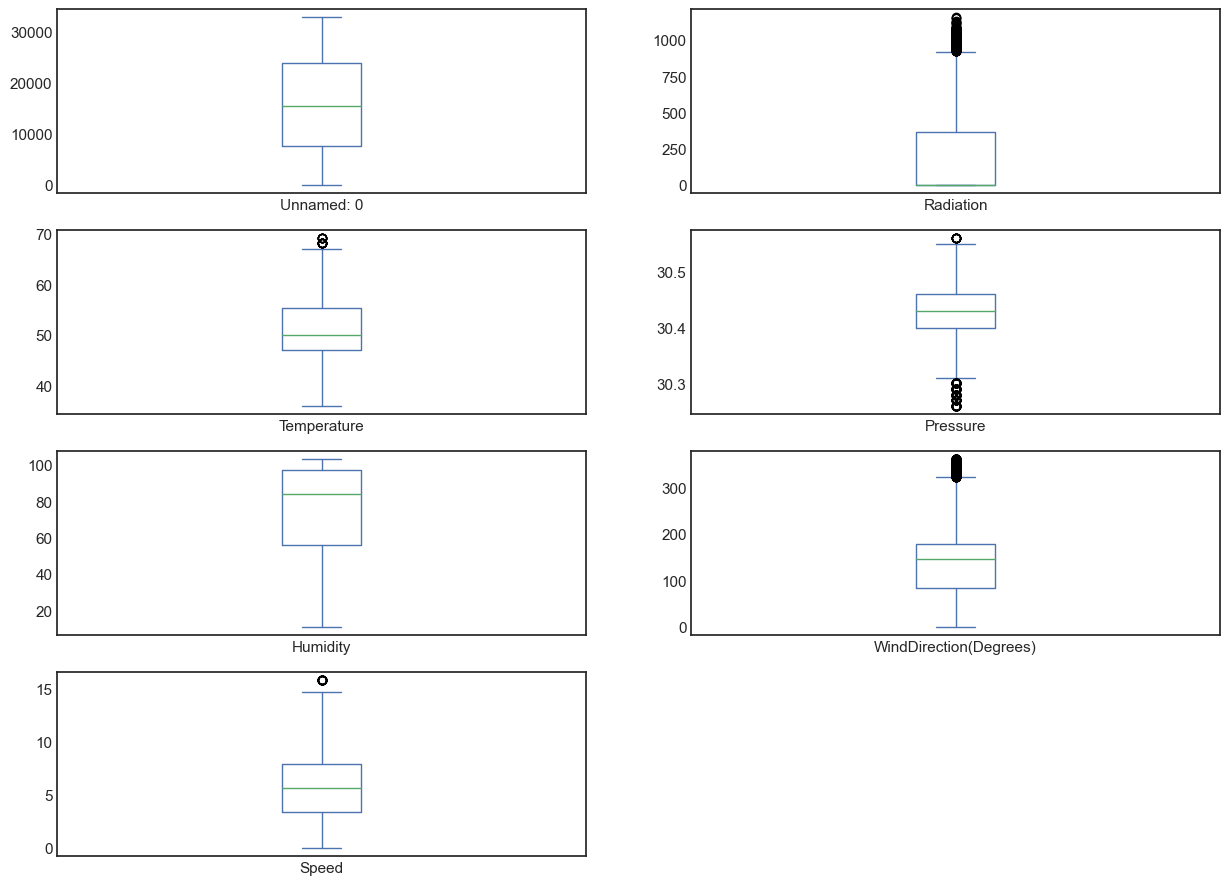

In [269]:
# Visualizing outliers
plt.style.use('seaborn-white')
Dataset.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20))
plt.show()

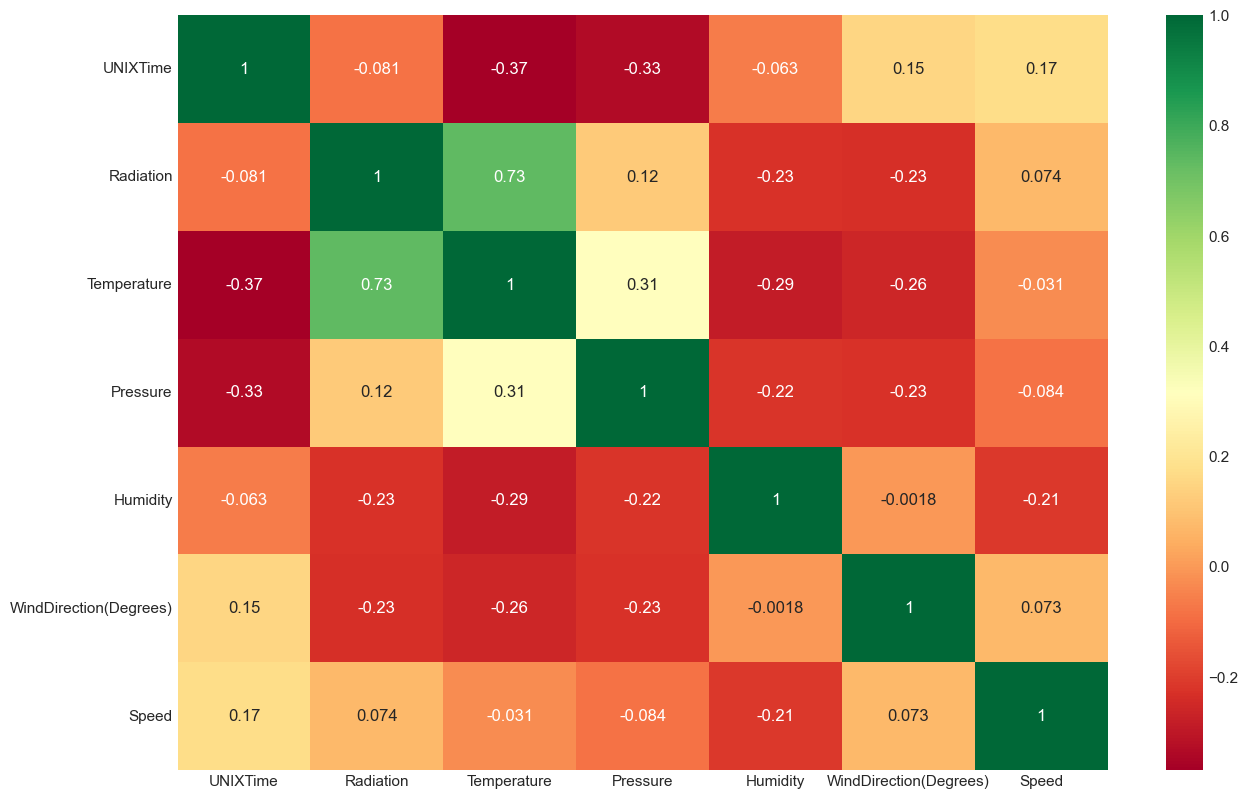

In [293]:
# A correlation matrix was computed to evaluate which features are the most relevant to the models
plt.figure(figsize=(15,10))
sns.heatmap(Dataset.corr(),annot=True,cmap='RdYlGn')
plt.show()

<li> The correlation between the dependent variable (Radiation, label) and the 
independent variables (features) shows that most of the features have correlation (both positive and nigative) with 
the label. However, Speed show no linear correlation to  the label.

## Feature engineerng

#### Data splitting - training, validation and test set 

In [350]:
blind_data = [ '10/19/2016 12:00:00 AM', '12/18/2016 12:00:00 AM' ,'11/20/2016 12:00:00 AM','12/05/2016  00:00:00']

In [351]:
test_data = Dataset [Dataset ['Data'].isin(blind_data)]
train_data = Dataset [~Dataset ['Data'].isin(blind_data)]

In [352]:
train_data = train_data.iloc[:,3:9]
train_data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,1.21,48,30.46,59,177.39,5.62
1,1.21,48,30.46,58,176.78,3.37
2,1.23,48,30.46,57,158.75,3.37
3,1.21,48,30.46,60,137.71,3.37
4,1.17,48,30.46,62,104.95,5.62


Text(0.5, 1.0, 'Features Correlating with Radiation')

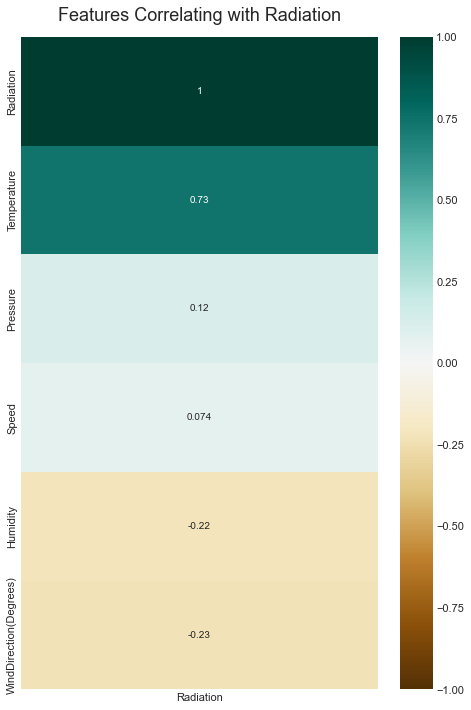

In [353]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(train_data.corr()[['Radiation']].sort_values(by='Radiation', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Radiation', fontdict={'fontsize':18}, pad=16)

Regadless its correlation property, we will conduct trial and error with different combinations of features to achieve the best result

### Outlier removal for the well logs
###### Local outlier factor

It removes the outlier by measuring the local density deviation of a given data point with respect to the data points near it.

Local density is determined by estimating distances between data points that are neighbors (k-nearest neighbors). So for each data point, local density can be calculated. By comparing these we can check which data points have similar densities and which have a lesser density than its neighbors. The ones with the lesser densities are considered as the outliers.
Firstly, k-distances are distances between points that are calculated for each point to determine their k-nearest neighbors. The 2nd closest point is said to be the 2nd nearest neighbor to the point


###### Once class SVM

A One-class classification method is used to detect the outliers and anomalies in a dataset. Based on Support Vector Machines (SVM) evaluation, the One-class SVM applies a One-class classification method for novelty detection.

This algorithm can be applied to high-dimensional data sets.


In [354]:
# # make copy of well_train_norm, called well_train_dropped
train_drop = train_data.copy()

# # on the train_drop, drop WELL and DEPTH column
# well_train_drop = well_train_drop.drop(['WELL', 'DEPTH'], axis=1)

In [358]:
# transform to logarithmic
train_drop['Radiation'] = np.log10(train_drop['Radiation'])

In [359]:

# Remove 'UNIXTime' column
#train_drop =Dataset.drop(['UNIXTime','Data','Time','TimeSunRise','TimeSunSet'], axis=1)
#train_drop

### Outlier removal 

In [360]:
#from sklearn.neighbors import LocalOutlierFactor
#from sklearn.svm import OneClassSVM

# Method 1: Standard Deviation Method (traditional)
train_std = train_drop[np.abs(train_drop - train_drop.mean()) <= (3 * train_drop.std())]

#Method 2: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.3) #the proportion of outliers in the data set
yhat = lof.fit_predict(train_drop)
mask = yhat != -1
train_lof = train_drop[mask]

# Method 3: One-class SVM
svm = OneClassSVM(nu=0.1) #controls the sensitivity of the support vectors and should be tuned to the approximate ratio of outliers in the data. default is 0.5
yhat = svm.fit_predict(train_drop)
mask = yhat != -1
train_svm = train_drop[mask]

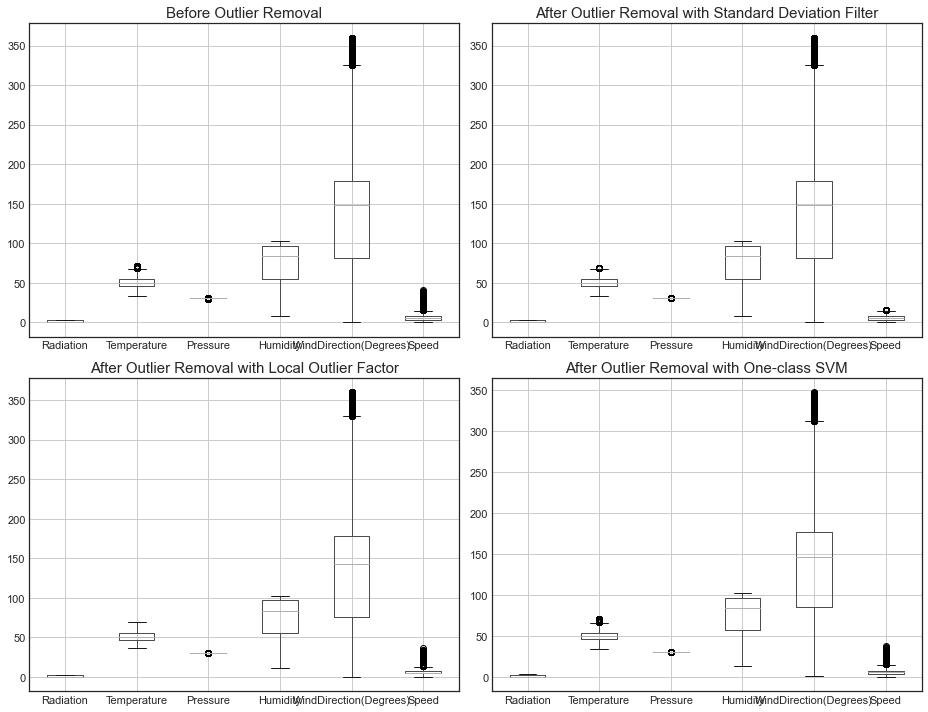

In [361]:
plt.figure(figsize=(13,10))

plt.subplot(2,2,1)
train_drop.boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(2,2,2)
train_std.boxplot()
plt.title('After Outlier Removal with Standard Deviation Filter', size=15)

plt.subplot(2,2,3)
#train_lof[logs].boxplot()
train_lof.boxplot()
plt.title('After Outlier Removal with Local Outlier Factor', size=15)

plt.subplot(2,2,4)
#train_svm[logs].boxplot()
train_svm.boxplot()
plt.title('After Outlier Removal with One-class SVM', size=15)

plt.tight_layout()
plt.show()

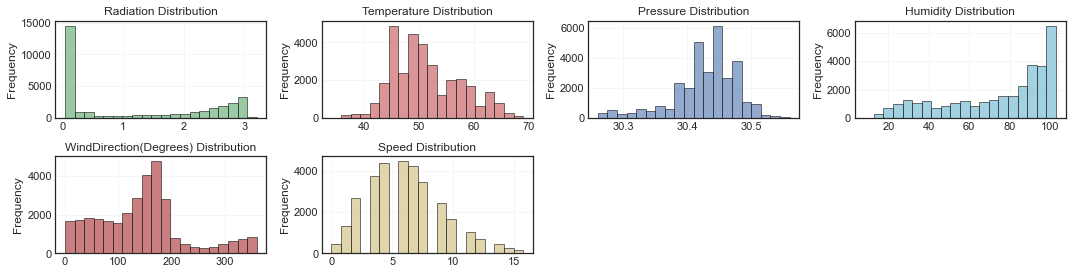

In [362]:
# Data distribution after outliers removal
rows = 8
cols = 4
colors = ['g','r','b','c','brown','y','m','grey','purple','orange','silver','g','r','b','c','brown','y','m','grey','purple','orange','silver', 'g','r','b','c','brown','y','m','grey','purple','orange']
fig=plt.figure(figsize=(15,15))

for i, feature in enumerate(train_std.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    train_std[feature].hist(bins=20,ax=ax,color=colors[i], alpha=0.6, edgecolor='k')
    ax.set_title(feature+" Distribution")
    ax.set_ylabel('Frequency')
    ax.set_axisbelow(True)
    ax.grid(color='whitesmoke')

plt.tight_layout()  
plt.show()

In [363]:
features = [feat for feat in train_std.columns]
print(features)

['Radiation', 'Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)', 'Speed']


In [364]:
train_std.isnull().sum()

Radiation                   0
Temperature                53
Pressure                  519
Humidity                    0
WindDirection(Degrees)      0
Speed                     312
dtype: int64

In [365]:
# Drop null values as it is not much and not expected to affect data density
train_std.dropna(inplace=True)

In [366]:
train_std.to_excel('training_data.xlsx')

Scaling data


Since many of our algorithm sare based on point-to-point distance, it is essential to scale the data as a higher variance in one dimension might lead to worse performance of the model. We are just going to use the MinMaxScaler algorithm within sklearn. 

Scaling the data means it helps to Normalize the data within a particular range.

When MinMaxScaler is used the it is also known as Normalization and it transform all the values in range between (0 to 1) formula is x = [(value - min)/(Max- Min)]

StandardScaler comes under Standardization and its value ranges between (-3 to +3) formula is z = [(x - x.mean)/Std_deviation]



StandardScaler() will transform each value in the column to range about the mean 0 and standard deviation 1, ie, each value will be normalised by subtracting the mean and dividing by standard deviation. Use StandardScaler if you know the data distribution is normal.

MinMax Scaler shrinks the data within the given range, 0 to 1. It transforms data by scaling features to a given range. It scales the values to a specific value range without changing the shape of the original distribution.

- The fit(data) method is used to compute the mean and std dev for a given feature so that it can be used further for scaling.

- The transform(data) method is used to perform scaling using mean and std dev calculated using the .fit() method.

- The fit_transform() method does both fit and transform.

In [367]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(train_svm)
scaled_data = pd.DataFrame(scaled_data, columns=features)

In [368]:
training_data = pd.read_excel('training_data.xlsx')
training_data.head()

,Unnamed: 0,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,0,0.082785,48,30.46,59,177.39,5.62
1,1,0.082785,48,30.46,58,176.78,3.37
2,2,0.089905,48,30.46,57,158.75,3.37
3,3,0.082785,48,30.46,60,137.71,3.37
4,4,0.068186,48,30.46,62,104.95,5.62


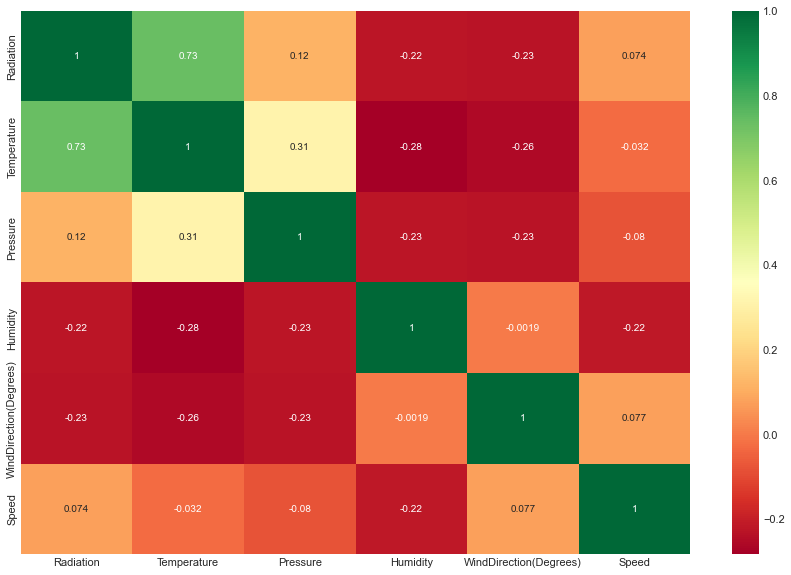

In [369]:
# A correlation matrix was computed to evaluate which features are the most relevant to the models
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

In [370]:
# Splittting the data into train (80% of the data) and validation(20% of the data) parts and choosing the
# the values to be predicted

 

train , test = train_test_split(training_data, test_size = 0.2)

 
x_train = train.drop(['Radiation','Unnamed: 0'], axis=1)
y_train = train['Radiation']

 
x_test = test.drop(['Radiation','Unnamed: 0'], axis = 1)
y_test = test['Radiation']

In [371]:
### Performing RandomForest (RF)

0.660161868750577


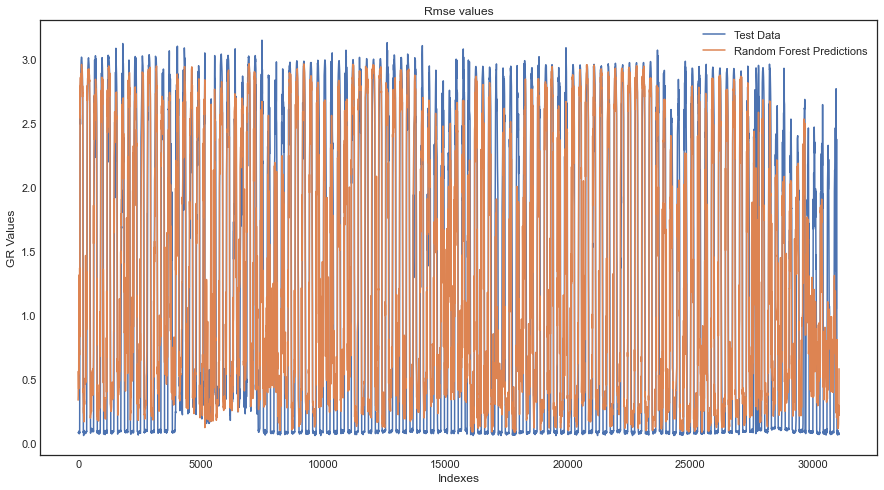

In [372]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor(max_depth= 15, min_samples_leaf=46)
RF.fit(x_train,y_train)   
RF_y_pred=RF.predict(x_test)

mse=mean_squared_error(RF_y_pred,y_test)
rmse=np.sqrt(mse)

results = pd.DataFrame()

results['Test Data']=y_test
#print(y_test.shape)

results['Predictions']=RF_y_pred

#Sorting them by based on the keys from the test data
results = results.sort_index()
#results

plt.figure(figsize=(15,8))
plt.plot(results['Test Data'],)
plt.plot(results['Predictions'])
plt.title('Rmse values')
plt.xlabel('Indexes')
plt.ylabel('GR Values')
plt.legend(['Test Data','Random Forest Predictions'])

print (rmse)

### Performing XGBoost

In [373]:
import xgboost as xgb
XGB = xgb.sklearn.XGBRegressor(random_state=42)
XGB.fit(x_train,y_train, early_stopping_rounds=10, eval_metric='rmse', eval_set=[(x_train,y_train)]) 

[0]	validation_0-rmse:1.08950
[1]	validation_0-rmse:0.89913
[2]	validation_0-rmse:0.78518
[3]	validation_0-rmse:0.71857
[4]	validation_0-rmse:0.67939
[5]	validation_0-rmse:0.65618
[6]	validation_0-rmse:0.63862
[7]	validation_0-rmse:0.62751
[8]	validation_0-rmse:0.62144
[9]	validation_0-rmse:0.61559
[10]	validation_0-rmse:0.60958
[11]	validation_0-rmse:0.60565
[12]	validation_0-rmse:0.60212
[13]	validation_0-rmse:0.59800
[14]	validation_0-rmse:0.59577
[15]	validation_0-rmse:0.59183
[16]	validation_0-rmse:0.59119
[17]	validation_0-rmse:0.58915
[18]	validation_0-rmse:0.58657
[19]	validation_0-rmse:0.58607
[20]	validation_0-rmse:0.58368
[21]	validation_0-rmse:0.58256


C:\Users\mohammmali4\Anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

C:\Users\mohammmali4\Anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[22]	validation_0-rmse:0.58175
[23]	validation_0-rmse:0.58039
[24]	validation_0-rmse:0.57996
[25]	validation_0-rmse:0.57893
[26]	validation_0-rmse:0.57711
[27]	validation_0-rmse:0.57567
[28]	validation_0-rmse:0.57480
[29]	validation_0-rmse:0.57361
[30]	validation_0-rmse:0.57248
[31]	validation_0-rmse:0.57184
[32]	validation_0-rmse:0.56941
[33]	validation_0-rmse:0.56667
[34]	validation_0-rmse:0.56615
[35]	validation_0-rmse:0.56569
[36]	validation_0-rmse:0.56359
[37]	validation_0-rmse:0.56195
[38]	validation_0-rmse:0.55984
[39]	validation_0-rmse:0.55888
[40]	validation_0-rmse:0.55851
[41]	validation_0-rmse:0.55703
[42]	validation_0-rmse:0.55665
[43]	validation_0-rmse:0.55440
[44]	validation_0-rmse:0.55190
[45]	validation_0-rmse:0.55096
[46]	validation_0-rmse:0.55031
[47]	validation_0-rmse:0.54971
[48]	validation_0-rmse:0.54849
[49]	validation_0-rmse:0.54656
[50]	validation_0-rmse:0.54606
[51]	validation_0-rmse:0.54473
[52]	validation_0-rmse:0.54327
[53]	validation_0-rmse:0.54151
[54]	val

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [374]:
predictions = XGB.predict(x_test)

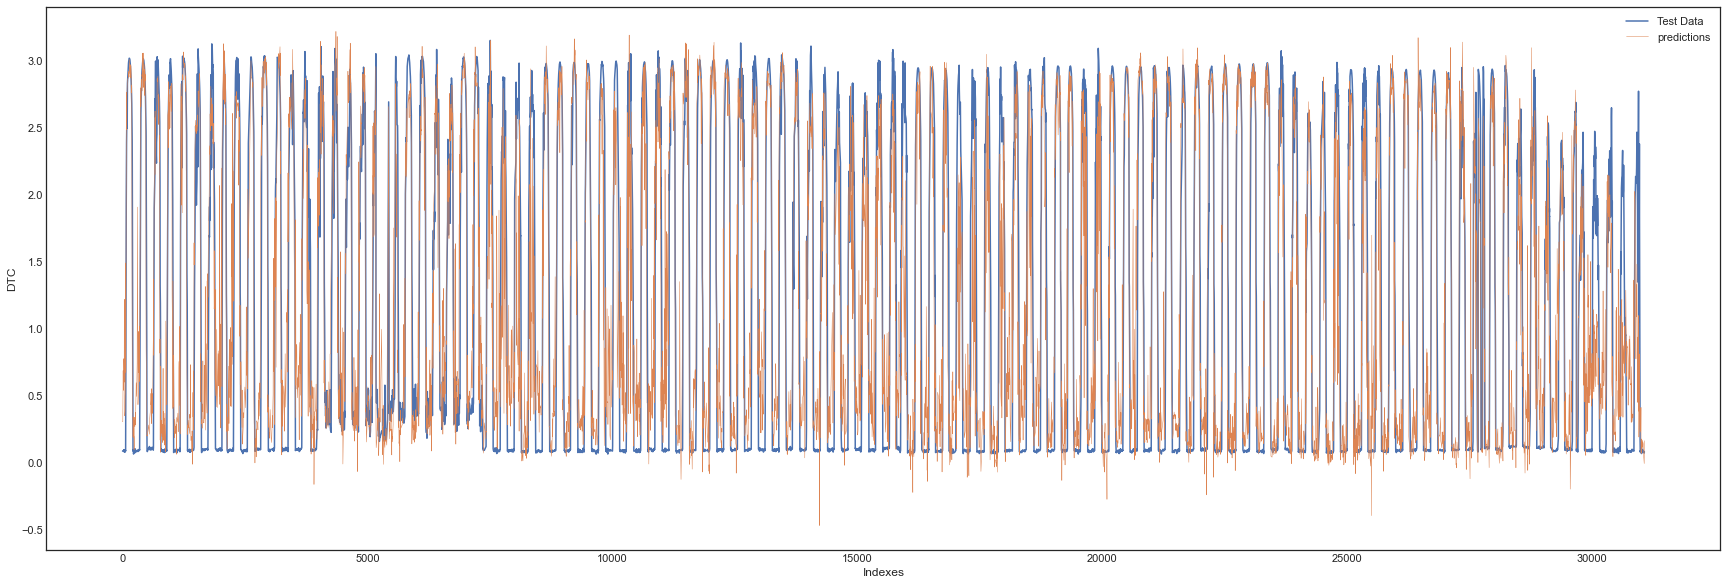

In [375]:
%matplotlib inline
from sklearn.metrics import mean_squared_error   
# Adding the Test data and predictions into a dataframe
results = pd.DataFrame()
results['Test Data']=y_test


#print(y_test.shape)
results['predictions']=predictions
#results['well']=test['WELL']


#Sorting them by based on the keys from the test data
results = results.sort_index()
results

mse=mean_squared_error(predictions,y_test)
rmse_XGB=np.sqrt(mse)
rmse_XGB


plt.figure(figsize=(30,10))
plt.plot(results['Test Data'])
plt.plot(results['predictions'],linewidth=0.5)


#plt.title('Rmse values')
plt.xlabel('Indexes')
plt.ylabel('DTC')
plt.legend(['Test Data','predictions'])
#%matplotlib inline
plt.show()







In [376]:
mse=mean_squared_error(predictions,y_test)
rmse_XGB=np.sqrt(mse)
rmse_XGB

0.6108829522915229

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


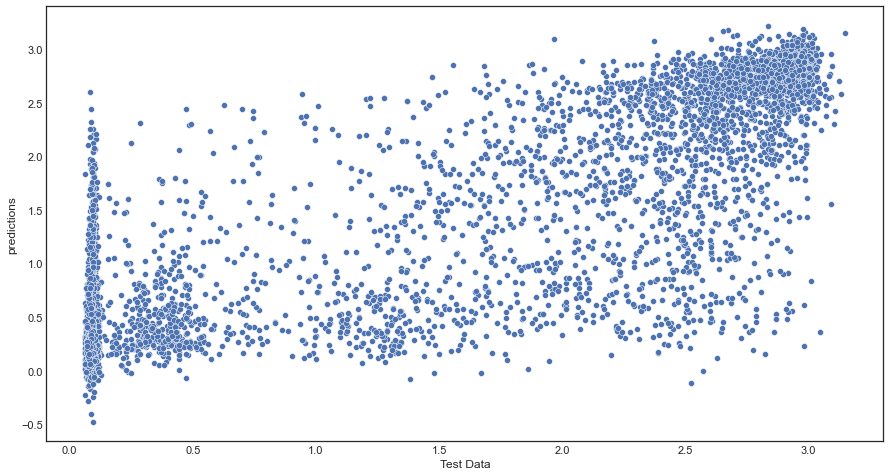

In [377]:
fig, scatter = plt.subplots(figsize = (15,8))
scatter = sns.scatterplot(x = 'Test Data', y ='predictions', data=results)

 

scatter.legend(loc='upper right', fontsize = 7);

Evaluation

In [378]:
from sklearn.metrics import r2_score

r2RF=r2_score(RF_y_pred,y_test)
r2XGB=r2_score(predictions,y_test)

print(r2RF)
print(r2XGB)

0.5542030545513696
0.654161293174973


In [379]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test, RF_y_pred))
print(explained_variance_score(y_test, predictions))

0.6997843268388513
0.7429461408309459
